Adam Lambert (C00257510)
# k Nearest Neighbour Notebook Log

## Understanding of Model

The following notebook explores using the k Nearest Neighbour model. k Nearest Neighbour implements learning based on the user-specified k number of neighbouring points of a chosen point.

\

## Changes Made

* I initially attempted to see what the impact of modifying the optimal k value of the model included in the notebook. The current optimal k value is k=1, resulting in an accuracy of 1.0 on the training set and 0.96 on the test set. Modifying this to 3 decreased the values of the training classification report across the board, yet resulted in a higher test accuracy. This trend of above 0.94 accuracy continued up to a k of 80, after which the number of n_neighbours was greater than the number of n_samples, resulting in a sharp decrease of all classification values, and an accuracy of 0.6. This accuracy only continued to decrease as the k value exceeded the number of n_samples.

* I also attempted to modify the size of the training and test sets to see what impact it would have on k Nearest Classification. This demonstrated to me that on simple datasets kNN can give fairly accurate results (~0.9) on a training set as low as 0.1 of supplied data.

* Modification of parameters such as the models' weight and algorithm used did not appear to make any notable difference on the used datasets.

\

## New Dataset

* Next I worked with [this dataset](https://www.kaggle.com/datasets/youssefaboelwafa/hotel-booking-cancellation-prediction/data) in an attempt to predict whether people would cancel their hotel booking based on a multitude of factors using a k Nearest Neighbour model.
* Following along with [this notebook](https://www.kaggle.com/code/youssefaboelwafa/hotel-booking-cancellation-multiple-models), first the dataset was prepared for use with a kNN model.
  * The booking ID column was dropped as it was not necessary for use.
  * As a kNN model requires all features to be represented by numerical data, multiple columns had to be refactored.
    * The booking status column had 'Cancelled' replaced with 1 and 'Not Cancelled' replaced with 0.
    * The date object was split into three separate columns, day, month and year.
    * All other object columns were converted to numerical values using one-hot encoding. The pandas function get_dummies allowed for the categorical values to be replaced with dummy numerical representations.
    * The booking status column was dropped to a separate dataframe as this is the target feature.
  
  * Next, using scikit learn's SelectKBest function, removing all but the highest k scoring features.
  * The data was then split into a 0.8 training set and 0.2 test set.
  * GridSearchCV was used to find the optimal k value, which was 19. The preferred k value would continue to increase if allowed however it made no significant improvement to the classification results.
  * The model ended with an accuracy of 0.84.

# k-Nearest Neighbors (kNN)
This Jupyter notebook summarizes the <a href=#pros>Pros</a> and <a href=#cons>Cons</a> of the k-Nearest Neighbors algorithm and gives two Python examples on usage for <a href=#clas>Classification</a> and <a href=#reg>Regression</a>.

## Theory<sup>1,2,3</sup>  
* Is a non-probabilistic, non-parametric and instance-based learning algorithm (see <a href=#reference>References</a>:
    * **Non-parametric** means it makes no explicit assumptions about the function form of _h_, avoiding the dangers of mis-modelling the underlying distribution of the data
        * For example, suppose our data is highly non-Gaussian but the learning model was choose assumes a Gaussian form. In that case, a parametric algorithm would make extremely poor predictions.
    * **Instance-based** learning means that the algorithm does not explicitly learn a model
        * Instead, it chooses to memorize the training instances which are subsequently used as "knowledge" for the prediction phase
        * Concretely, this means that only when a query to our database is made (i.e., when we ask it to predict a label given an input), will the algorithm use the training instances to predict the result

### Pros<a name="pros"/>
* **simple** to understand and implement
* with **little to zero training time**
* kNN **works just as easily with multi-class data** sets whereas other algorithms are hard-coded for the binary setting
* the non-parametric nature of kNN gives it an edge in certain settings where the data may be highly unusual, thus **without prior knowledge on distribution**

### Cons<a name="cons"/>
* **computationally expensive** testing phase
    * we **need to store the whole data set for each decision**!
* can **suffer from skewed class distributions**
    * for example, if a certain class is very frequent in the training set, it will tend to dominate the majority voting of the new example (large number = more common)
* the accuracy can be severally **degraded with high-dimension data** because of the little difference between the nearest and farthest neighbor
    * **the curse of dimensionality** refers to various phenomena that arise when analyzing and organizing data in high-dimensional spaces that do not occur in low-dimensional settings such as the three-dimensional physical space of everyday experience
    * for high-dimensional data (e.g., with number of dimensions more than 10) **scaling** and **dimension reductions** (such as PCA) is usually performed prior applying kNN
    
### References<a name="reference"/>  
* <sup>1</sup>Wikipedia [kNN](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm), [Curse of dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality)
* <sup>2</sup>Sklearn [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html), [KNeighborsRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)
* <sup>3</sup>[Complete Guide to K-Nearest-Neighbors](https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor)

## Classification<a name="clas"/>
* the output is a class membership
* an object is classified by a **majority vote** of its neighbours, with the object being assigned to the class most common among its k nearest neighbours
    * if k = 1, then the object is simply assigned to the class of that nearest neighbour
    
    
### Example: predict [IRIS](https://scikit-learn.org/stable/datasets/index.html#iris-dataset) class

Set environment

In [4]:
# Scikit-learn
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
# other libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Use vector drawing inside jupyter notebook
%config InlineBackend.figure_format = "svg"
# Set matplotlib default axis font size (inside this notebook)
plt.rcParams.update({'font.size': 8})

Load data

In [ ]:
iris = datasets.load_iris()
# This is extra step that can be omitted but Pandas DataFrame contains some powerfull features
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df = df.assign(target=iris.target)

Show data summary: extend the `describe` method by selected stats
* See the Jupyter notebook on **Standard Procedure** for more details

In [ ]:
# Compute selected stats
dfinfo = pd.DataFrame(df.dtypes,columns=["dtypes"])
for (m,n) in zip([df.count(),df.isna().sum()],["count","isna"]):
    dfinfo = dfinfo.merge(pd.DataFrame(m,columns=[n]),right_index=True,left_index=True,how="inner");
# Add to `describe` output
dfinfo.T.append(df.describe())

<ipython-input-5-8d08ef13a8cf>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfinfo.T.append(df.describe())


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
dtypes,float64,float64,float64,float64,int64
count,150,150,150,150,150
isna,0,0,0,0,0
count,150.0,150.0,150.0,150.0,150.0
mean,5.843333,3.057333,3.758,1.199333,1.0
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.3,2.0,1.0,0.1,0.0
25%,5.1,2.8,1.6,0.3,0.0
50%,5.8,3.0,4.35,1.3,1.0
75%,6.4,3.3,5.1,1.8,2.0


Show histogram (distribution)

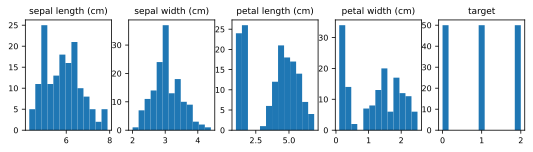

In [ ]:
plt.figure(figsize=(9,2))
for (i,v) in enumerate(df.columns):
    plt.subplot(1,df.shape[1],i+1);
    plt.hist(df.iloc[:,i],bins="sqrt")
    plt.title(df.columns[i],fontsize=9);

Show correlation matrix

In [ ]:
df.corr().round(2).style.background_gradient(cmap="viridis")

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.120000,0.870000,0.820000,0.780000
sepal width (cm),-0.120000,1.000000,-0.430000,-0.370000,-0.430000
petal length (cm),0.870000,-0.430000,1.000000,0.960000,0.950000
petal width (cm),0.820000,-0.370000,0.960000,1.000000,0.960000
target,0.780000,-0.430000,0.950000,0.960000,1.000000


Scale and try to **reduce dimensions**: what we try to do is to **always simply the model** if possible (see correlation matrix above)
* More complex model (e.g., more features, or higher _*k*_) will (in theory) increase the probability of higher "out of sample" error (even when "in sample" error = train set) will be smaller!
* Use either 99% threshold (own subjective) or "mle" algorithm (more objective)
* Use **linear** scaler (transformation)
* Here, the data is scaled prior train-test split.
    * In real applications, first split and scale afterwards, to simulate real-world scenario where we do not have the test set! (otherwise data snooping effect)

In [ ]:
scale = StandardScaler(with_mean=True,with_std=True);
Xo = scale.fit_transform(df.drop(["target"],axis=1).values);

In [ ]:
pca = PCA(n_components=0.99)# or set n_components="mle"
X = pca.fit_transform(Xo)
print("Nr. of features after PCA = {} (input = {})".format(X.shape[1],Xo.shape[1]))

Nr. of features after PCA = 3 (input = 4)


Prepare for fitting

In [ ]:
# encode target values (is not necessary for IRIS but still:-)
y = LabelEncoder().fit_transform(df["target"].values);
# Split 2/3 to 1/3 train to test respectively
[X_train,X_test,y_train,y_test] = train_test_split(X,y,train_size = 0.67,test_size = 0.33,
                                                   stratify=y,random_state=123);

#### Find optimal model
* Considering the small data set (150 samples), find "optimal" k setting it to maximum of 5
    * Optimal in terms of accuracy
    * Simple model = higher probability of lower in and out-of sample error

In [ ]:
model = KNeighborsClassifier(algorithm="auto");
parameters = {"n_neighbors":[1,3,5],
              "weights":["uniform","distance"]}
model_optim = GridSearchCV(model, parameters, cv=5,scoring="accuracy");

In [ ]:
model_optim.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

Show the "optimal" settings for kNN

In [ ]:
model_optim.best_estimator_

KNeighborsClassifier(n_neighbors=1)

#### Show resulting accuracy

In [ ]:
for (i,x,y) in zip(["Train","Test"],[X_train,X_test],[y_train,y_test]):
    print("Classification kNN",i," report:\n",classification_report(y,model_optim.predict(x)))

Classification kNN Train  report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        33
           2       1.00      1.00      1.00        33

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

Classification kNN Test  report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.88      0.94        17
           2       0.89      1.00      0.94        17

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



In this case, the precision (accuracy=macro avg precision) is very high.
Just to show that that is not coincidence compare to "dummy" model (most frequent & uniform distribution)

In [ ]:
for i in ["most_frequent","uniform"]:
    dummy = DummyClassifier(strategy=i).fit(X_train,y_train);
    print("Classification ",i," test report:",classification_report(y_test,dummy.predict(X_test)))

Classification  most_frequent  test report:               precision    recall  f1-score   support

           0       0.32      1.00      0.48        16
           1       0.00      0.00      0.00        17
           2       0.00      0.00      0.00        17

    accuracy                           0.32        50
   macro avg       0.11      0.33      0.16        50
weighted avg       0.10      0.32      0.16        50

Classification  uniform  test report:               precision    recall  f1-score   support

           0       0.28      0.31      0.29        16
           1       0.40      0.47      0.43        17
           2       0.33      0.24      0.28        17

    accuracy                           0.34        50
   macro avg       0.34      0.34      0.33        50
weighted avg       0.34      0.34      0.33        50



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Regression<a name="reg"/>
* Predicts value as the **average of the values** of its k nearest neighbors

### Example: Predict House price
* Use Scikit-learn [California Housing](https://scikit-learn.org/stable/datasets/index.html#california-housing-dataset) data set
    * This is a large data set that allows us to use more complex model
* Nontheless, try to reduce the number of features: via visual inspection and using PCA

Load data

In [ ]:
house = datasets.fetch_california_housing()
df = pd.DataFrame(house.data,columns=house.feature_names)
df = df.assign(target=house.target)

In [ ]:
# df = pd.read_csv("../input/test-data/california_housing.csv").drop(columns=["Unnamed: 0"],errors='ignore')

Inspect data: show statistics, histogram and correlation

In [ ]:
# Compute selected stats
dfinfo = pd.DataFrame(df.dtypes,columns=["dtypes"])
for (m,n) in zip([df.count(),df.isna().sum()],["count","isna"]):
    dfinfo = dfinfo.merge(pd.DataFrame(m,columns=[n]),right_index=True,left_index=True,how="inner");
# Add to `describe` output
dfinfo.T.append(df.describe())

<ipython-input-18-8d08ef13a8cf>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfinfo.T.append(df.describe())


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
dtypes,float64,float64,float64,float64,float64,float64,float64,float64,float64
count,20640,20640,20640,20640,20640,20640,20640,20640,20640
isna,0,0,0,0,0,0,0,0,0
count,20640.0,20640.0,20640.0,20640.0,20640.0,20640.0,20640.0,20640.0,20640.0
mean,3.870671,28.639486,5.429,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.38605,2.135952,2.003532,1.153956
min,0.4999,1.0,0.846154,0.333333,3.0,0.692308,32.54,-124.35,0.14999
25%,2.5634,18.0,4.440716,1.006079,787.0,2.429741,33.93,-121.8,1.196
50%,3.5348,29.0,5.229129,1.04878,1166.0,2.818116,34.26,-118.49,1.797
75%,4.74325,37.0,6.052381,1.099526,1725.0,3.282261,37.71,-118.01,2.64725


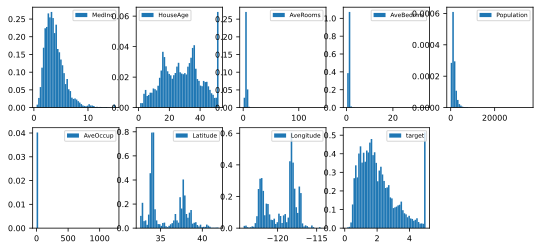

In [ ]:
plt.figure(figsize=(9,4))
for (i,v) in enumerate(df.columns):
    plt.subplot(2,5,i+1);
    plt.hist(df.iloc[:,i],50,density=True)
    plt.legend([df.columns[i]],fontsize=6);

In [ ]:
df.corr().round(2).style.background_gradient(cmap="viridis")

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
MedInc,1.000000,-0.120000,0.330000,-0.060000,0.000000,0.020000,-0.080000,-0.020000,0.690000
HouseAge,-0.120000,1.000000,-0.150000,-0.080000,-0.300000,0.010000,0.010000,-0.110000,0.110000
AveRooms,0.330000,-0.150000,1.000000,0.850000,-0.070000,-0.000000,0.110000,-0.030000,0.150000
AveBedrms,-0.060000,-0.080000,0.850000,1.000000,-0.070000,-0.010000,0.070000,0.010000,-0.050000
Population,0.000000,-0.300000,-0.070000,-0.070000,1.000000,0.070000,-0.110000,0.100000,-0.020000
AveOccup,0.020000,0.010000,-0.000000,-0.010000,0.070000,1.000000,0.000000,0.000000,-0.020000
Latitude,-0.080000,0.010000,0.110000,0.070000,-0.110000,0.000000,1.000000,-0.920000,-0.140000
Longitude,-0.020000,-0.110000,-0.030000,0.010000,0.100000,0.000000,-0.920000,1.000000,-0.050000
target,0.690000,0.110000,0.150000,-0.050000,-0.020000,-0.020000,-0.140000,-0.050000,1.000000


#### Supervised Reduction
* Considering the correlation, histogram and the summary table:
    * Remove/drop "AveOccup" (average house occupancy)

In [ ]:
df = df.drop(["AveOccup"],axis=1)

Prepare for fitting by scaling data set
* Here, the data is scaled prior train-test split.
    * In real applications, first split and scale afterwards, to simulate real-world scenario where we do not have the test set!

In [ ]:
X = StandardScaler().fit_transform(df.drop("target",axis=1).values);
y = df.target.values

In [ ]:
X = PCA(n_components="mle").fit_transform(X)
print("Nr. of features after reduction = {} (input = {})".format(X.shape[1],df.shape[1]))

Nr. of features after reduction = 6 (input = 8)


#### Fit model

In [ ]:
[X_train,X_test,y_train,y_test] = train_test_split(X,y,train_size=0.1,test_size=0.9,
                                                   random_state=123);

In [ ]:
knn = KNeighborsRegressor();
parameters = {"n_neighbors":[1,3,5,7,9],
              "weights":["uniform","distance"]}
knn_reg = GridSearchCV(knn, parameters, cv=5, scoring="neg_mean_squared_error");

In [ ]:
knn_reg.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

In [ ]:
knn_reg.best_estimator_

KNeighborsRegressor(n_neighbors=7, weights='distance')

In [ ]:
print("Regression kNN (test) RMSE \t= {:.0f} *1000$".format(
    100*np.sqrt(mean_squared_error(knn_reg.predict(X_test),y_test))))

Regression kNN (test) RMSE 	= 72 *1000$


Compare to dummy

In [ ]:
for i in ["mean","median"]:
    dummy = DummyRegressor(strategy=i).fit(X_train,y_train);
    print("Regression ",i,"(test) RMSE \t= {:.0f} *1000$".format(
        100*np.sqrt(mean_squared_error(y_test,dummy.predict(X_test)))))

Regression  mean (test) RMSE 	= 116 *1000$
Regression  median (test) RMSE 	= 119 *1000$


In [11]:
from zipfile import ZipFile

In [12]:
with ZipFile("/content/booking.zip","r") as zipFile:
  zipFile.extractall()

In [13]:
df = pd.read_csv("booking.csv")

In [14]:
df.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [15]:
df.shape

(36285, 17)

In [16]:
df.drop(["Booking_ID"], axis=1, inplace=True)
df.index = df.index + 1
df.head()

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
1,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
2,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
3,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
5,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 1 to 36285
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   number of adults          36285 non-null  int64  
 1   number of children        36285 non-null  int64  
 2   number of weekend nights  36285 non-null  int64  
 3   number of week nights     36285 non-null  int64  
 4   type of meal              36285 non-null  object 
 5   car parking space         36285 non-null  int64  
 6   room type                 36285 non-null  object 
 7   lead time                 36285 non-null  int64  
 8   market segment type       36285 non-null  object 
 9   repeated                  36285 non-null  int64  
 10  P-C                       36285 non-null  int64  
 11  P-not-C                   36285 non-null  int64  
 12  average price             36285 non-null  float64
 13  special requests          36285 non-null  int64  
 14  date o

In [18]:
df.describe()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests
count,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000
mean,1.844839,0.105360,0.810693,2.204602,0.030977,85.239851,0.025630,0.023343,0.153369,103.421636,0.619733
std,0.518813,0.402704,0.870590,1.410946,0.173258,85.938796,0.158032,0.368281,1.753931,35.086469,0.786262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [19]:
df["booking status"] = df["booking status"].replace("Canceled", 1)
df["booking status"] = df["booking status"].replace("Not_Canceled", 0)

In [20]:
df = df[~df["date of reservation"].str.contains("-")]
df["date of reservation"] = pd.to_datetime(df["date of reservation"])

df["day"] = df["date of reservation"].dt.day
df["month"] = df["date of reservation"].dt.month
df["year"] = df["date of reservation"].dt.year

df = df.drop(columns=["date of reservation"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36248 entries, 1 to 36285
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   number of adults          36248 non-null  int64  
 1   number of children        36248 non-null  int64  
 2   number of weekend nights  36248 non-null  int64  
 3   number of week nights     36248 non-null  int64  
 4   type of meal              36248 non-null  object 
 5   car parking space         36248 non-null  int64  
 6   room type                 36248 non-null  object 
 7   lead time                 36248 non-null  int64  
 8   market segment type       36248 non-null  object 
 9   repeated                  36248 non-null  int64  
 10  P-C                       36248 non-null  int64  
 11  P-not-C                   36248 non-null  int64  
 12  average price             36248 non-null  float64
 13  special requests          36248 non-null  int64  
 14  bookin

<ipython-input-20-3a83e981ca0d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["date of reservation"] = pd.to_datetime(df["date of reservation"])
<ipython-input-20-3a83e981ca0d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["day"] = df["date of reservation"].dt.day
<ipython-input-20-3a83e981ca0d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

In [21]:
object_columns = df.select_dtypes(include=["object"]).columns
df = pd.get_dummies(df, columns=object_columns)
df = df.replace({True: 1, False: 0})

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36248 entries, 1 to 36285
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   number of adults                   36248 non-null  int64  
 1   number of children                 36248 non-null  int64  
 2   number of weekend nights           36248 non-null  int64  
 3   number of week nights              36248 non-null  int64  
 4   car parking space                  36248 non-null  int64  
 5   lead time                          36248 non-null  int64  
 6   repeated                           36248 non-null  int64  
 7   P-C                                36248 non-null  int64  
 8   P-not-C                            36248 non-null  int64  
 9   average price                      36248 non-null  float64
 10  special requests                   36248 non-null  int64  
 11  booking status                     36248 non-null  int

In [23]:
from sklearn.feature_selection import SelectKBest, f_classif

In [24]:
features = df.drop(["booking status"], axis=1)
target = df["booking status"]

k_best = SelectKBest(score_func=f_classif, k=10)

X = k_best.fit_transform(features, target)
y = target

# Get the indices of the selected features
selected_features_indices = k_best.get_support(indices=True)

# Get the scores associated with each feature
feature_scores = k_best.scores_

# Create a list of tuples containing feature names and scores
feature_info = list(zip(features.columns, feature_scores))

# Sort the feature info in descending order based on scores
sorted_feature_info = sorted(feature_info, key=lambda x: x[1], reverse=True)

for feature_name, feature_score in sorted_feature_info[:10]:
    print(f"{feature_name}: {feature_score:.2f}")

lead time: 8632.61
special requests: 2486.31
year: 1205.78
average price: 752.18
market segment type_Corporate: 466.80
repeated: 423.60
market segment type_Online: 412.92
number of week nights: 314.39
type of meal_Meal Plan 2: 274.19
number of adults: 273.41


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=5)

In [26]:
model = KNeighborsClassifier(algorithm="auto");
parameters = {"n_neighbors":[1,3,5,7,9,11,13,15,17,19],
              "weights":["uniform","distance"]}
model_optim = GridSearchCV(model, parameters, cv=5,scoring="accuracy");

In [27]:
model_optim.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [28]:
model_optim.best_estimator_

KNeighborsClassifier(n_neighbors=19, weights='distance')

In [29]:
for (i,x,y) in zip(["Train","Test"],[X_train,X_test],[y_train,y_test]):
    print("Classification kNN",i," report:\n",classification_report(y,model_optim.predict(x)))

Classification kNN Train  report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     19480
           1       0.99      0.98      0.98      9518

    accuracy                           0.99     28998
   macro avg       0.99      0.99      0.99     28998
weighted avg       0.99      0.99      0.99     28998

Classification kNN Test  report:
               precision    recall  f1-score   support

           0       0.84      0.94      0.89      4886
           1       0.84      0.63      0.72      2364

    accuracy                           0.84      7250
   macro avg       0.84      0.79      0.80      7250
weighted avg       0.84      0.84      0.83      7250

